In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing_df = pd.read_csv('Housing.csv')

In [3]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
housing_df['mainroad'].value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [6]:
###Data Cleaning and preprocessing 

In [7]:
missing_values = housing_df.isnull().sum()
missing_values #no missing values in the dataset 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
duplicate_rows = housing_df[housing_df.duplicated()]
print('Duplicate Rows: ' + duplicate_rows) #no duplicate rows in this dataset either

Empty DataFrame
Columns: [price, area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea, furnishingstatus]
Index: []


In [9]:
duplicate_values = housing_df.duplicated()
duplicate_values.value_counts() #no duplicate values 

False    545
dtype: int64

In [10]:
columns_to_drop = ['prefarea', 'furnishingstatus'] #I consider that for a real estate project these 2 columns arent that big of a deal features
housing_df.drop(columns=columns_to_drop, inplace=True)

In [11]:
housing_df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,yes,no,no,no,yes,2
1,12250000,8960,4,4,4,yes,no,no,no,yes,3
2,12250000,9960,3,2,2,yes,no,yes,no,no,2


In [12]:
# Convert categorical columns to proper data types
housing_df['mainroad'] = housing_df['mainroad'].astype('category')
housing_df['airconditioning'] = housing_df['airconditioning'].astype('category')

In [13]:
#data visualization

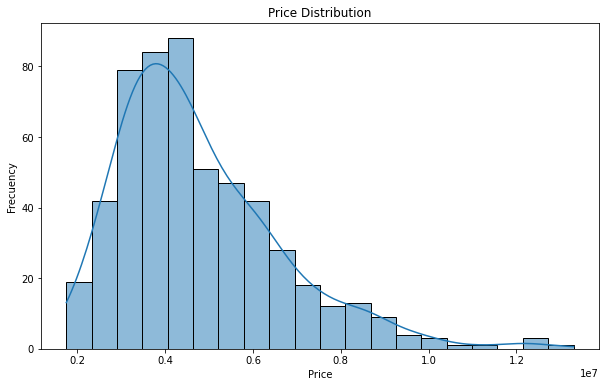

In [14]:
#Histogram of the Price for each property
plt.figure(figsize=(10, 6))
sns.histplot(housing_df['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frecuency')
plt.show()

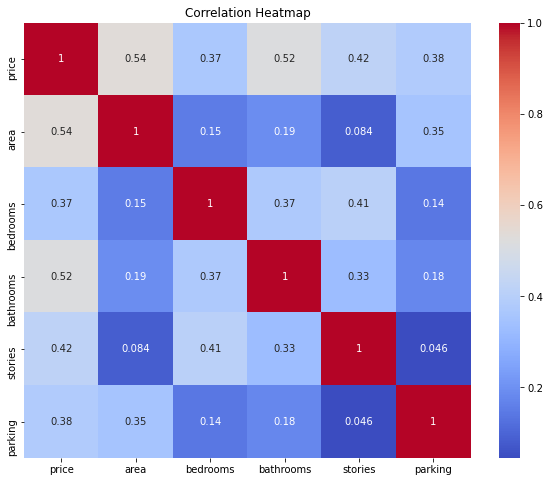

In [15]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

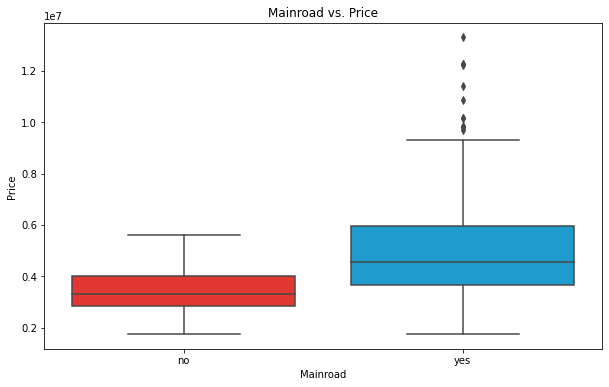

In [16]:
# Boxplot for categorical vs. numeric variable
plt.figure(figsize=(10, 6))
custom_colors = ["#ff1d15", "#02a9ea"]  # Red and green colors
sns.boxplot(x='mainroad', y='price', data=housing_df, palette=custom_colors)
plt.title('Mainroad vs. Price')
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.show()

In [17]:
#since we already know how our data looks like, we are going to do some changes to it.
#Removing outliers (extreme values) to get a more robust and solid analysis.

Q1 = housing_df['price'].quantile(.25)
Q3 = housing_df['price'].quantile(.75)
IQR = Q3 - Q1
housing_data = housing_df[(housing_df['price'] >= (Q1 - 1.5*IQR)) & (housing_df['price'] <= (Q3 + 1.5*IQR))]

In [18]:
housing_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking
15,9100000,6000,4,1,2,yes,no,yes,no,no,2
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1
17,8960000,8500,3,2,4,yes,no,no,no,yes,2
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2
19,8855000,6420,3,2,2,yes,no,no,no,yes,1
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2
541,1767150,2400,3,1,1,no,no,no,no,no,0
542,1750000,3620,2,1,1,yes,no,no,no,no,0
543,1750000,2910,3,1,1,no,no,no,no,no,0


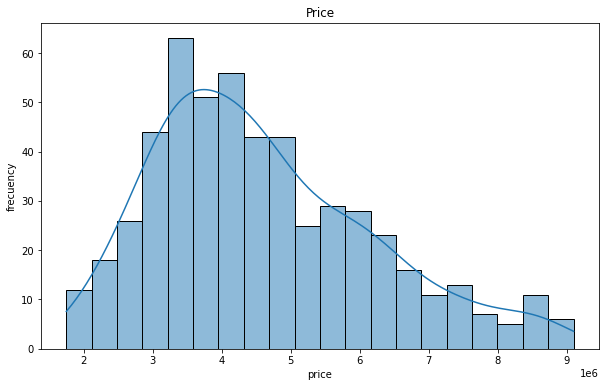

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], bins=20, kde=True)
plt.title('Price')
plt.xlabel('price')
plt.ylabel('frecuency')
plt.show()

In [20]:
median_price = housing_data['price'].median()
mean_price = housing_data['price'].mean()

formatted_median_price = "${:.2f}".format(median_price) 
formatted_mean_price = "${:.2f}".format(mean_price)

print('Median price of home in the dataset is: ', formatted_median_price)
print('Mean price of home in the dataset is: ', formatted_mean_price)

Median price of home in the dataset is:  $4270000.00
Mean price of home in the dataset is:  $4600663.09


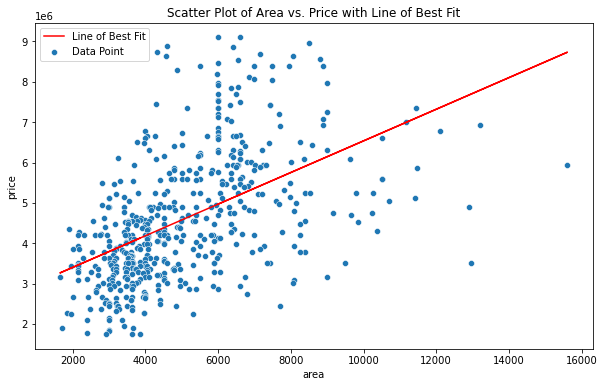

In [21]:
from sklearn.linear_model import LinearRegression

# Scatter plot with a line of best fit: Area vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=housing_data, label='Data Point')
# Fit a linear regression model
regressor = LinearRegression()
X = housing_data[['area']]
y = housing_data['price']
regressor.fit(X, y)

# Plot the regression line
plt.plot(X, regressor.predict(X), color='red', label='Line of Best Fit')

plt.title('Scatter Plot of Area vs. Price with Line of Best Fit')
plt.legend()
plt.show()

In [22]:
#Feautre Engineering 

In [26]:
## Lets calculate the ratio of 'area' to 'bedrooms' for each data point in ythe dataset and add it as a new column
housing_data.loc[:, 'area_to_bedrooms_ratio'] = housing_data['area'] / housing_data['bedrooms']

In [27]:
housing_data['area_to_bedrooms_ratio'].head()

0    1500.000000
1    1650.000000
2    2833.333333
3    1533.333333
4    2140.000000
Name: area_to_bedrooms_ratio, dtype: float64

In [28]:
#reset the index of the dataframe
housing_data.reset_index(drop=True, inplace=True)
# Convert "nan" values to NaN (Not a Number)
housing_data.loc[housing_data['area_to_bedrooms_ratio'] == "nan", 'area_to_bedrooms_ratio'] = np.nan

# Convert the 'area_to_bedrooms_ratio' column to numeric
housing_data.loc[:, 'area_to_bedrooms_ratio'] = pd.to_numeric(housing_data['area_to_bedrooms_ratio'], errors='coerce')

# Format the 'area_to_bedrooms_ratio' column to have 2 decimal places
housing_data.loc[:, 'area_to_bedrooms_ratio'] = housing_data['area_to_bedrooms_ratio'].apply(lambda x: "{:.2f}".format(x))

# Display the modified column
print(housing_data['area_to_bedrooms_ratio'])


0      1500.00
1      1650.00
2      2833.33
3      1533.33
4      2140.00
        ...   
525    1500.00
526     800.00
527    1810.00
528     970.00
529    1283.33
Name: area_to_bedrooms_ratio, Length: 530, dtype: object


In [29]:
#Visualization new column

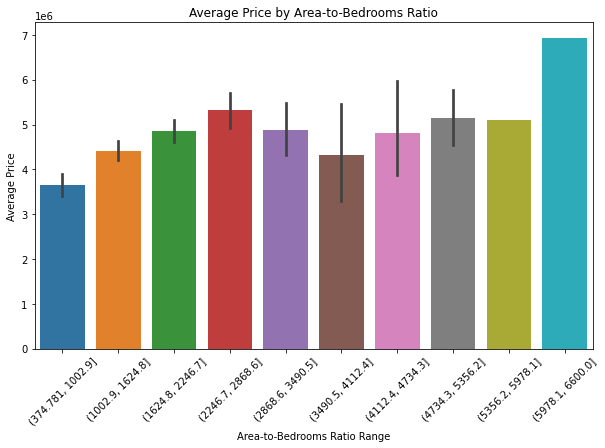

In [36]:
# Convert 'area_to_bedrooms_ratio' column to numeric
housing_data['area_to_bedrooms_ratio'] = pd.to_numeric(housing_data['area_to_bedrooms_ratio'], errors='coerce')

# Drop rows with missing values in 'area_to_bedrooms_ratio'
housing_data = housing_data.dropna(subset=['area_to_bedrooms_ratio'])

# Create a bar plot to show the average price by area-to-bedrooms ratio
plt.figure(figsize=(10, 6))
sns.barplot(x=pd.cut(housing_data['area_to_bedrooms_ratio'], bins=10), y=housing_data['price'])
plt.title('Average Price by Area-to-Bedrooms Ratio')
plt.xlabel('Area-to-Bedrooms Ratio Range')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()


In [37]:
#Exploring Categorical Values

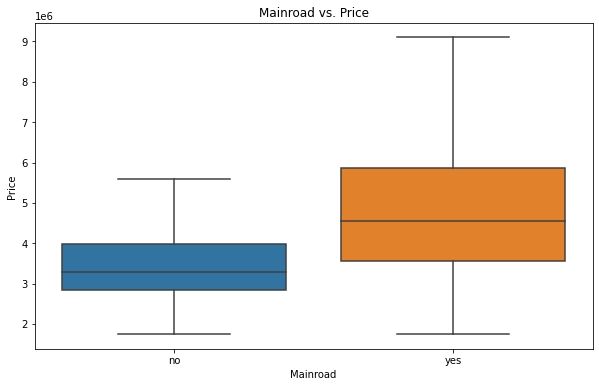

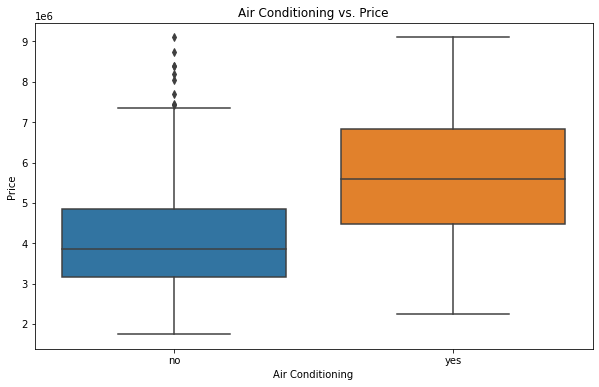

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='mainroad', y='price', data=housing_data)
plt.title('Mainroad vs. Price')
plt.xlabel('Mainroad')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='airconditioning', y='price', data=housing_data)
plt.title('Air Conditioning vs. Price')
plt.xlabel('Air Conditioning')
plt.ylabel('Price')
plt.show()
